# WALMART EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the datasets

In [2]:
df=pd.read_csv('walmart-sales-dataset-of-45stores.csv',parse_dates=['Date'])
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [4]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
df.shape

(6435, 8)

In [6]:
df.isnull().mean()*100

Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

In [7]:
df.duplicated().sum()

0

In [8]:
df.value_counts('Holiday_Flag')

Holiday_Flag
0    5985
1     450
dtype: int64

# Univariate analysis

## Histogram with kde plot

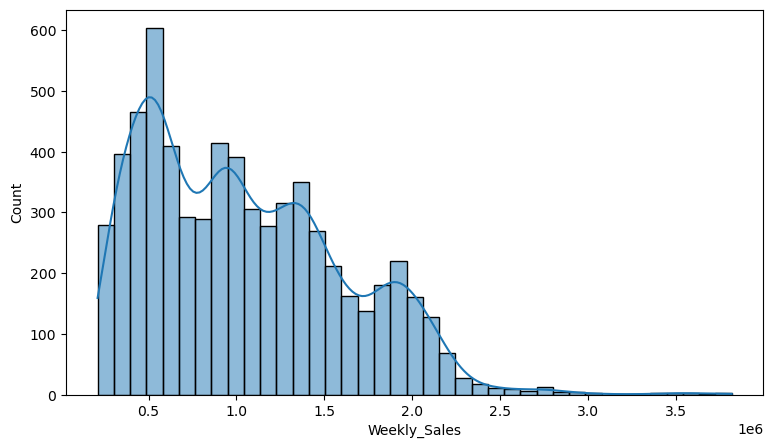

In [9]:
plt.figure(figsize=(9,5))
sns.histplot(data=df,x='Weekly_Sales',kde=True);
plt.show()

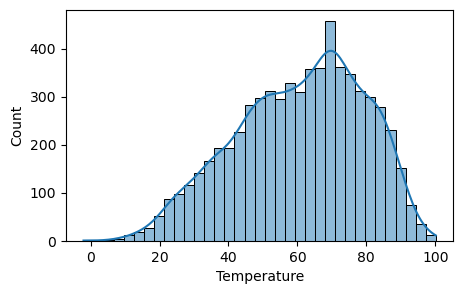

In [10]:
plt.figure(figsize=(5,3))
sns.histplot(data=df,x='Temperature',kde=True);
plt.show()

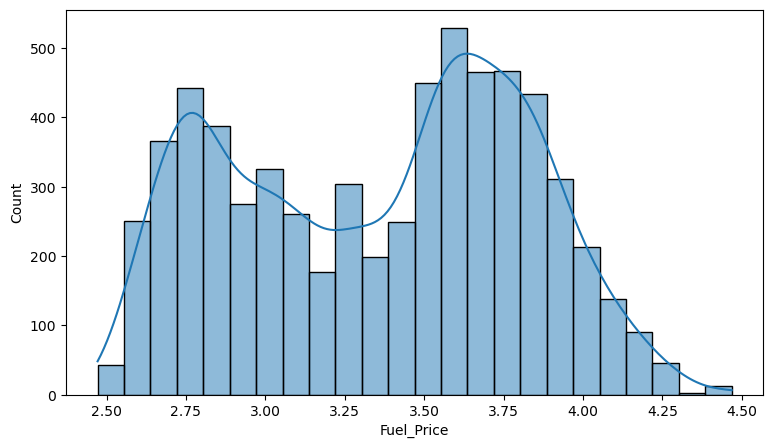

In [11]:
plt.figure(figsize=(9,5))
sns.histplot(data=df,x='Fuel_Price',kde=True);
plt.show()

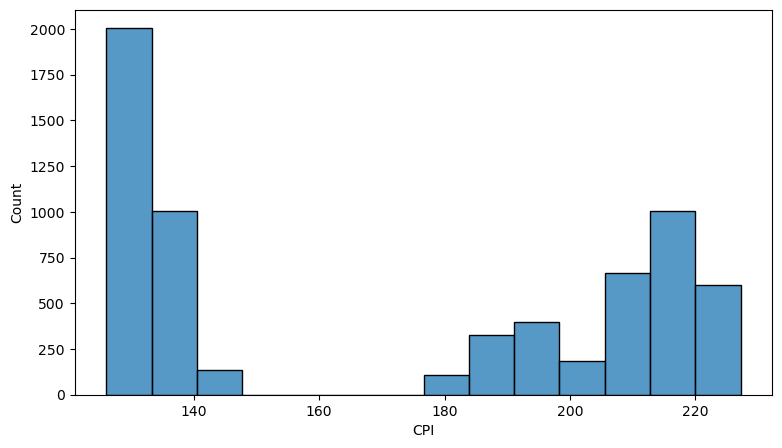

In [12]:
plt.figure(figsize=(9,5))
sns.histplot(data=df,x='CPI');
plt.show()

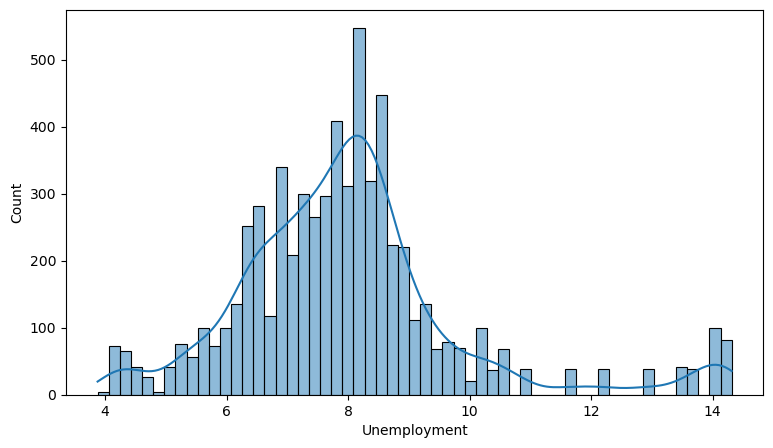

In [13]:
plt.figure(figsize=(9,5))
sns.histplot(data=df,x='Unemployment',kde=True);
plt.show()

## subplots of boxplot

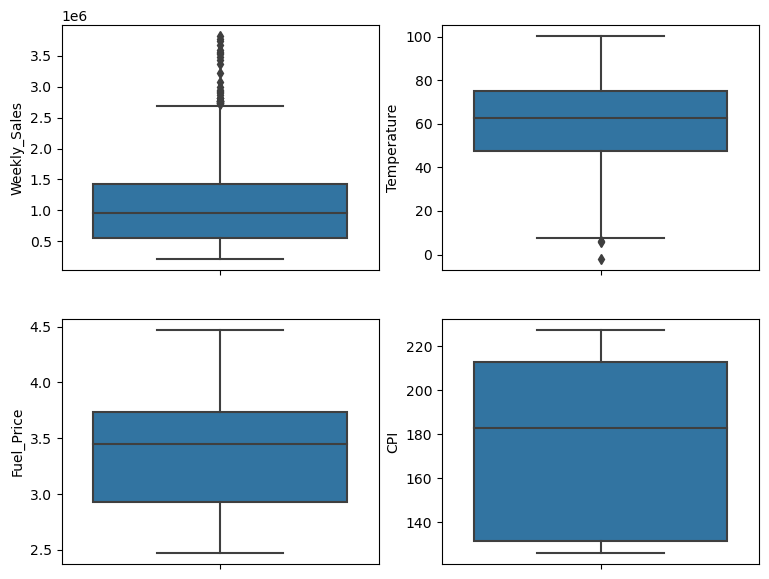

In [14]:
plt.figure(figsize=(9,7))

plt.subplot(2,2,1)
sns.boxplot(data=df,y='Weekly_Sales')

plt.subplot(2,2,2)
sns.boxplot(data=df,y='Temperature')

plt.subplot(2,2,3)
sns.boxplot(data=df,y='Fuel_Price')

plt.subplot(2,2,4)
sns.boxplot(data=df,y='CPI')
plt.show()

## multivariate analysis

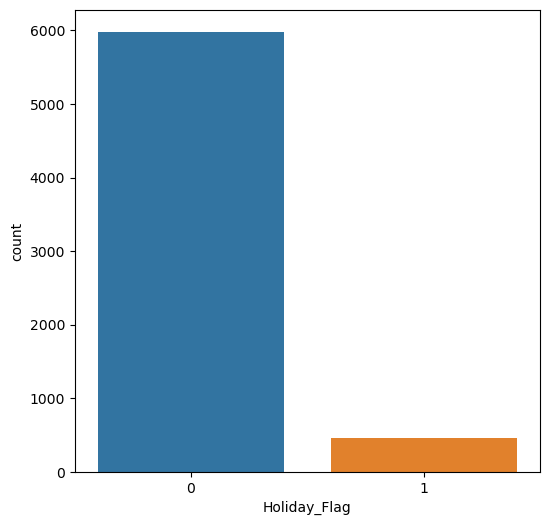

In [15]:
plt.figure(figsize=(6,6))
plt.subplot()
sns.countplot(data=df,x='Holiday_Flag')
plt.show()

### Line charts

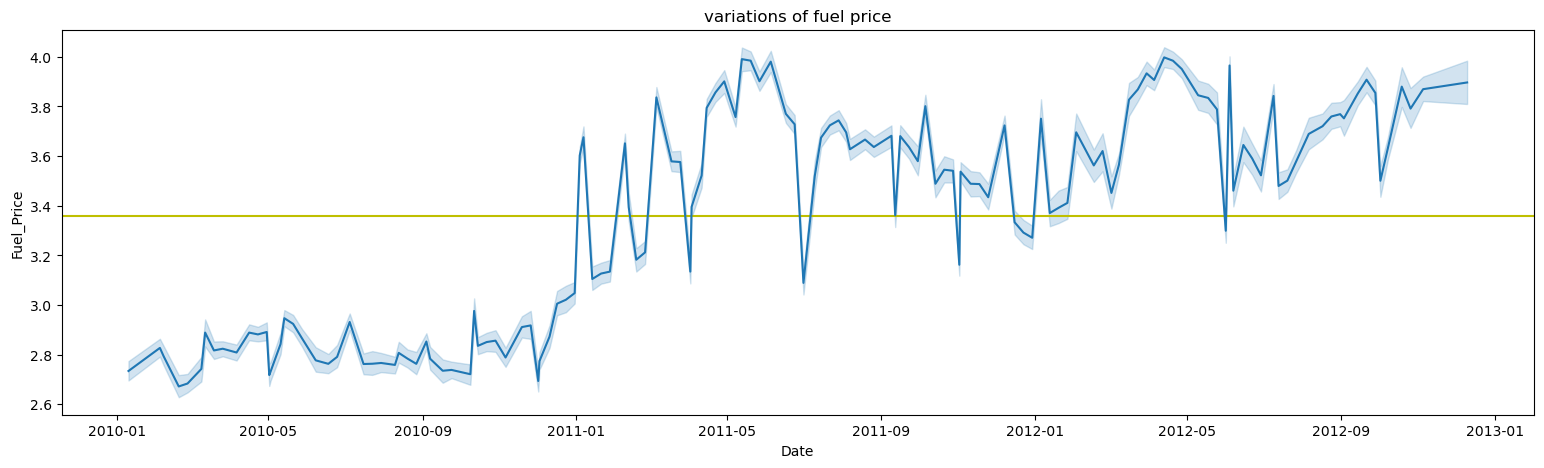

In [16]:
plt.figure(figsize=(19,5))
plt.axhline(y=df.Fuel_Price.mean(),color='y')
sns.lineplot(data=df,x='Date',y='Fuel_Price')
plt.title('variations of fuel price')
plt.show()

#### Fuel price tends to increase above mean from the year 2011

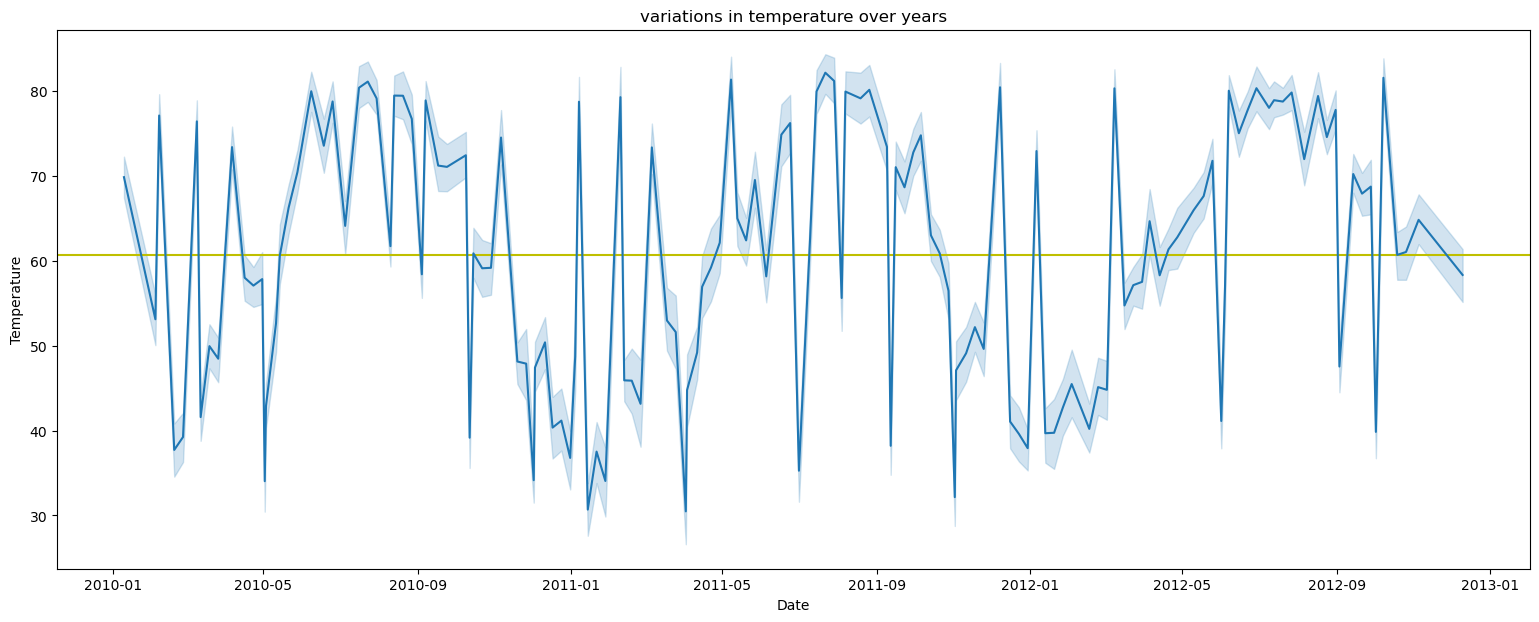

In [17]:
plt.figure(figsize=(19,7))
plt.axhline(df.Temperature.mean(),color='y')
sns.lineplot(data=df,x='Date',y='Temperature')
plt.title('variations in temperature over years')
plt.show()

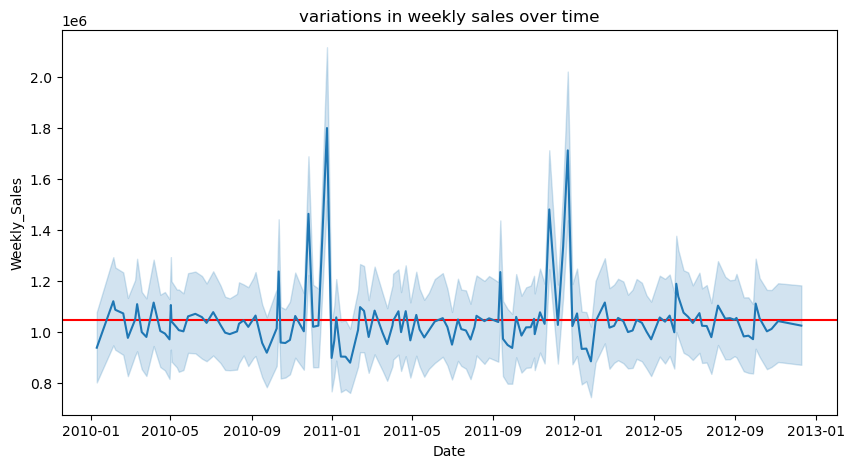

In [58]:
plt.figure(figsize=(10,5))
plt.axhline(df.Weekly_Sales.mean(),color='r')
plt.title('variations in weekly sales over time')
sns.lineplot(data=df,y='Weekly_Sales',x='Date')
plt.show()

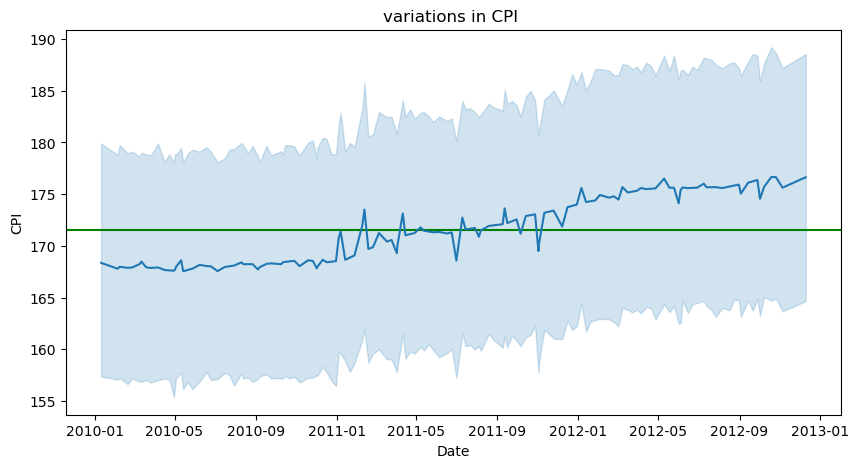

In [19]:
plt.figure(figsize=(10,5))
plt.axhline(df.CPI.mean(),color='g')
plt.title('variations in CPI ')
sns.lineplot(data=df,x='Date',y='CPI')
plt.show()

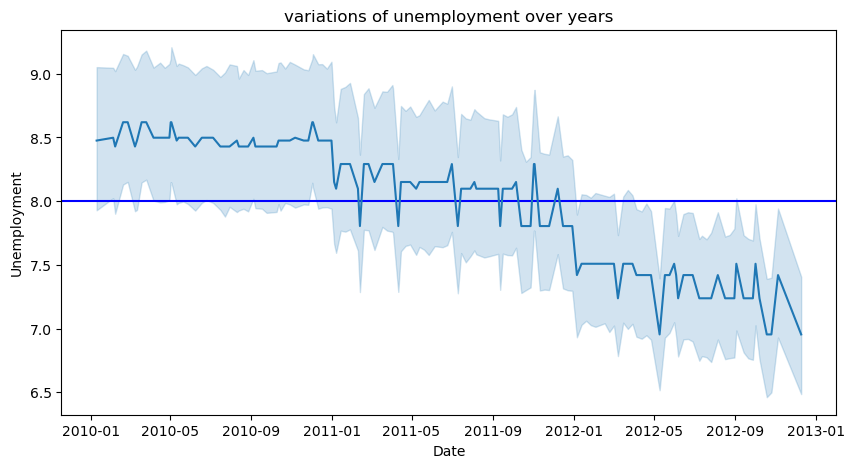

In [20]:
plt.figure(figsize=(10,5))
plt.axhline(df.Unemployment.mean(),color='b')
plt.title('variations of unemployment over years')
sns.lineplot(data=df,x='Date',y='Unemployment')
plt.show()

## Scatter plots

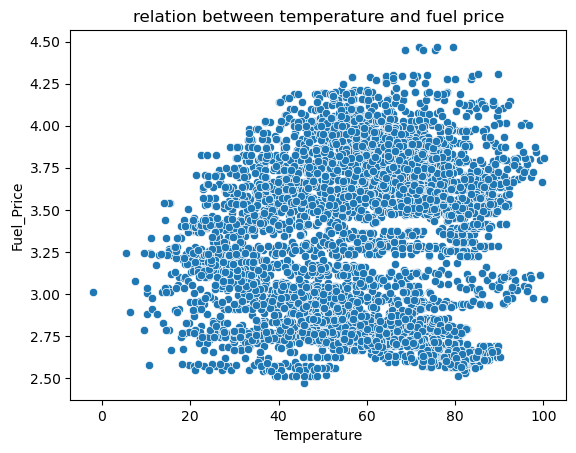

In [21]:
sns.scatterplot(data=df,x='Temperature',y='Fuel_Price')
plt.title('relation between temperature and fuel price')
plt.show()

there is no correlation between temperature and fuel price

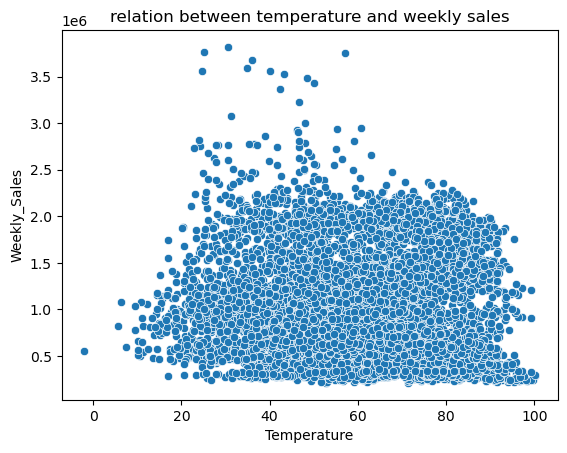

In [22]:
sns.scatterplot(data=df,x='Temperature',y='Weekly_Sales')
plt.title('relation between temperature and weekly sales')
plt.show()

There is no correlation between temperature and weekly sales

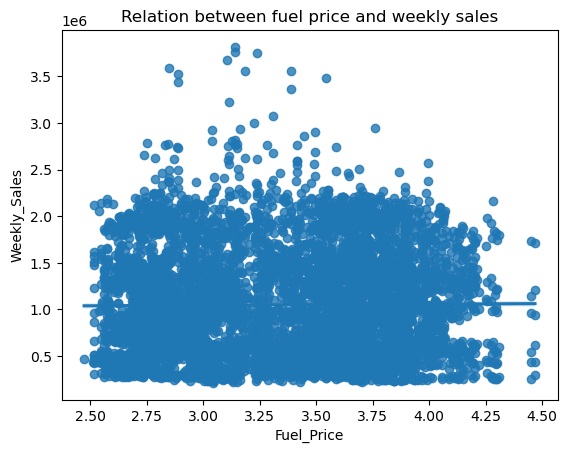

In [23]:
sns.regplot(data=df,x='Fuel_Price',y='Weekly_Sales')
plt.title('Relation between fuel price and weekly sales')
plt.show()

There is no correlation between fuel price and weekly sales

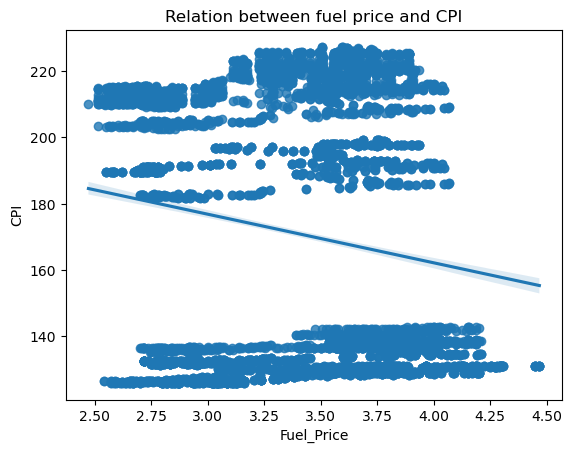

In [24]:
sns.regplot(data=df,x='Fuel_Price',y='CPI')
plt.title('Relation between fuel price and CPI')
plt.show()

There is a slight negative correlation between fuel price and CPI

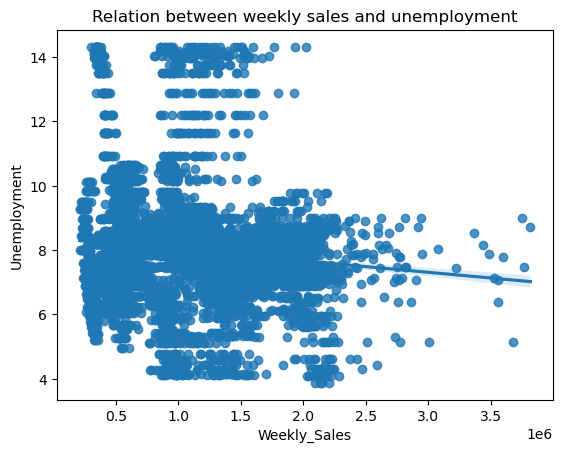

In [25]:
sns.regplot(data=df,x='Weekly_Sales',y='Unemployment')
plt.title('Relation between weekly sales and unemployment')
plt.show()

There is no correlation between weekly sales and unemployment.

## creating new columns- year,month and day

In [26]:
df['year']= df.Date.dt.year
df['month']=df.Date.dt.month
df['day']=df.Date.dt.weekday

In [27]:
df['month']=df.month.replace({1:'January',2:'February',3:'March',
                               4:'April',
                               5:'May',
                               6:'June',
                               7:'July',
                               8:'August',
                               9:'September',
                               10:'October',
                               11:'November',
                               12:'December'})
df['day']=df.day.replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [28]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,May,Saturday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,December,wednesday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,February,Thursday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,February,Thursday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,May,Sunday


## Line plots

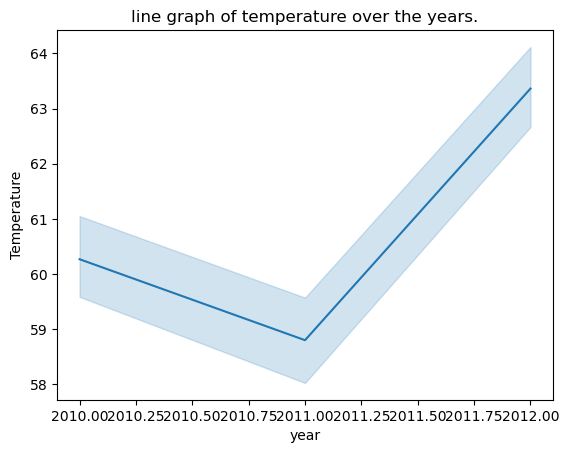

In [29]:
plt.title('line graph of temperature over the years.')
sns.lineplot(data=df,x='year',y='Temperature')
plt.show()

temperature increases rapidly from 2011

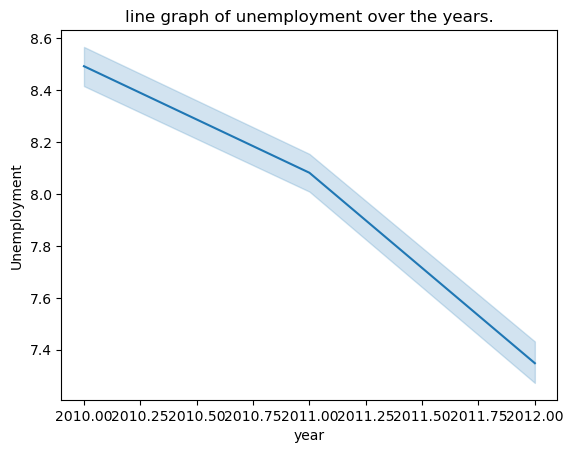

In [30]:
plt.title('line graph of unemployment over the years.')
sns.lineplot(data=df,x='year',y='Unemployment')
plt.show()

the graph shows  that unemployment decreases over the years

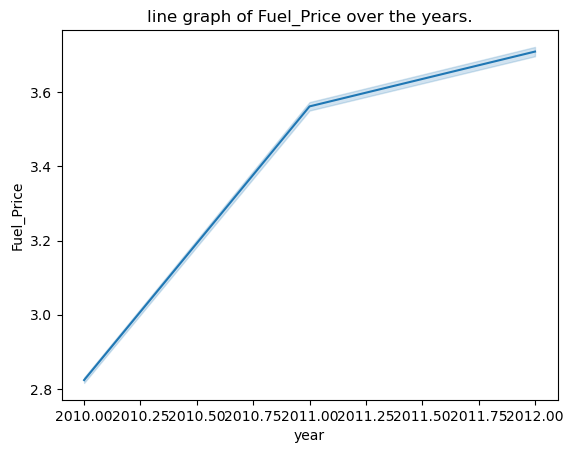

In [31]:
plt.title('line graph of Fuel_Price over the years.')
sns.lineplot(data=df,x='year',y='Fuel_Price')
plt.show()

fuel price increases every year.

## find the store with highest weekly sale

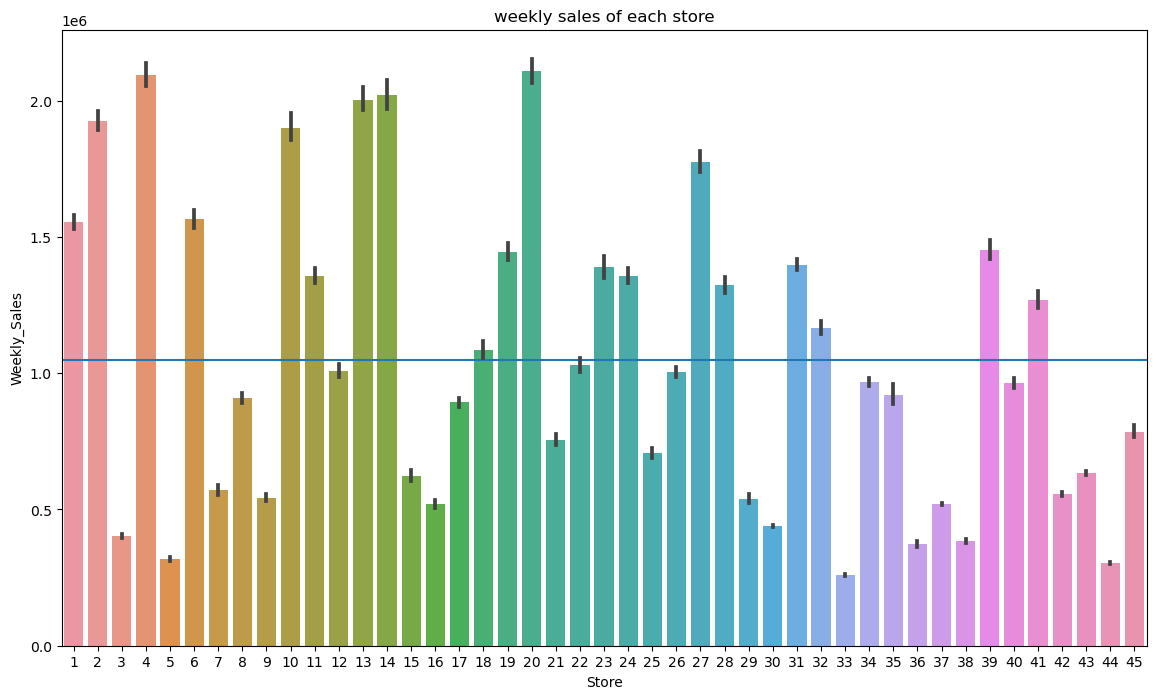

In [32]:
plt.figure(figsize=(14,8))
plt.axhline(df.Weekly_Sales.mean())
plt.title('weekly sales of each store')
sns.barplot(data=df,y='Weekly_Sales',x='Store')
plt.show()

weekly sales is highest in store 20

### store with highest CPI

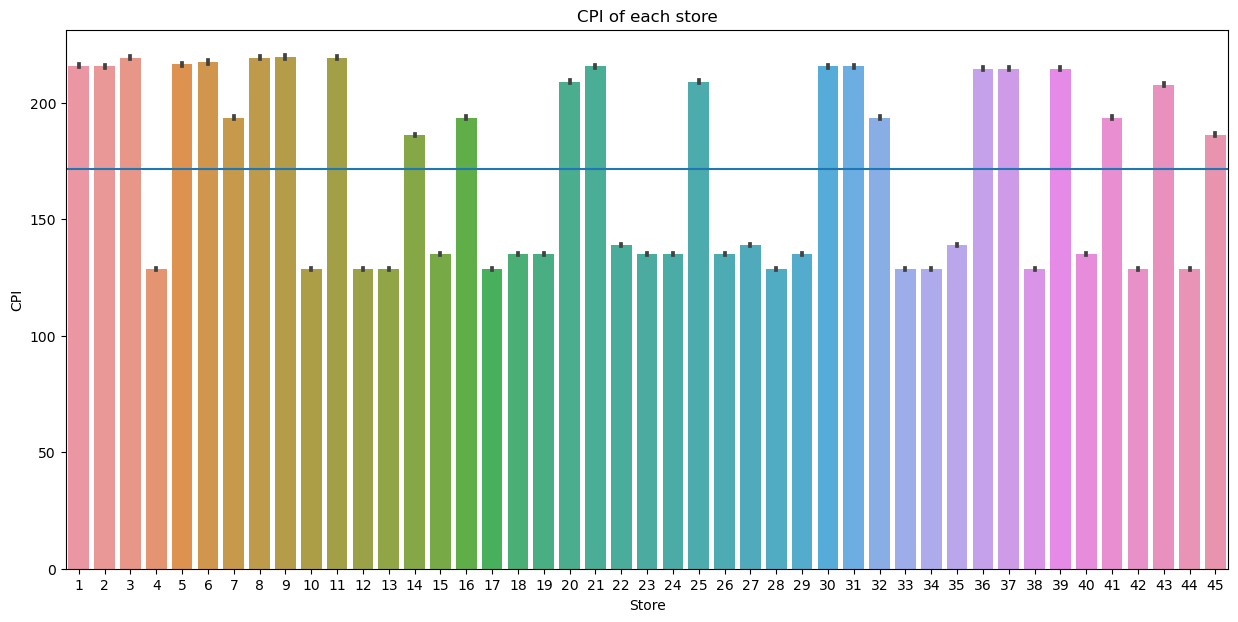

In [33]:
plt.figure(figsize=(15,7))
plt.axhline(df.CPI.mean())
plt.title('CPI of each store')
sns.barplot(data=df,y='CPI',x='Store')
plt.show()

 unemployment in each store

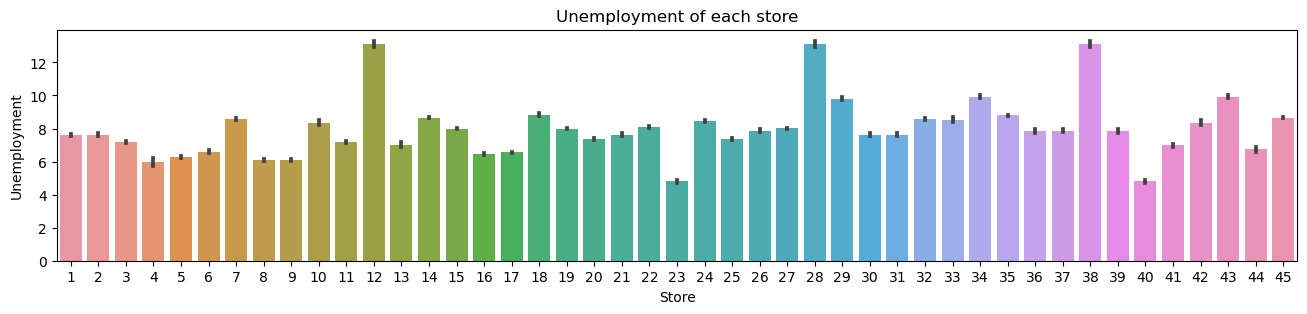

In [34]:
plt.figure(figsize=(16,3))
plt.title('Unemployment of each store')
sns.barplot(data=df,y='Unemployment',x='Store')
plt.show()

Most unemployment occurs in store 12,28 & 38 

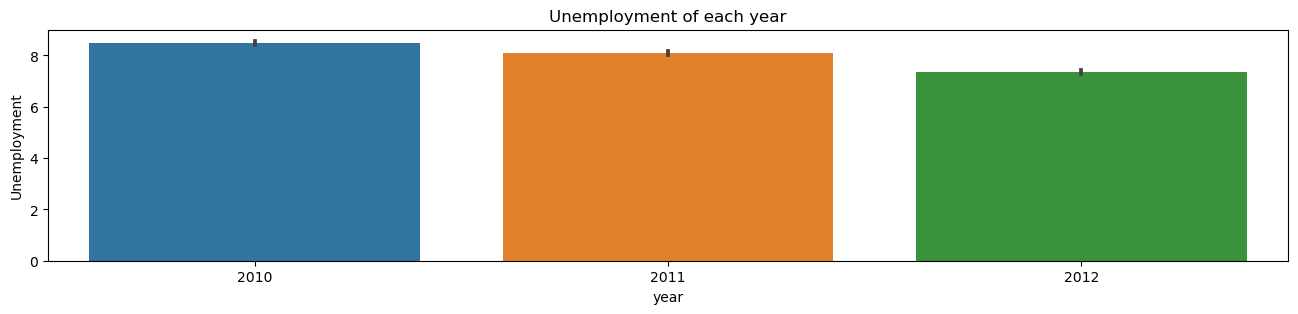

In [35]:
plt.figure(figsize=(16,3))
plt.title('Unemployment of each year')
sns.barplot(data=df,y='Unemployment',x='year')
plt.show()

 Most unemployment was in the year 2010

## average weekly sales in all stores

In [36]:
average_weekly_sales = df.groupby(['Store'])['Weekly_Sales'].mean()


In [37]:
average_weekly_sales.nlargest(1)

Store
20    2.107677e+06
Name: Weekly_Sales, dtype: float64

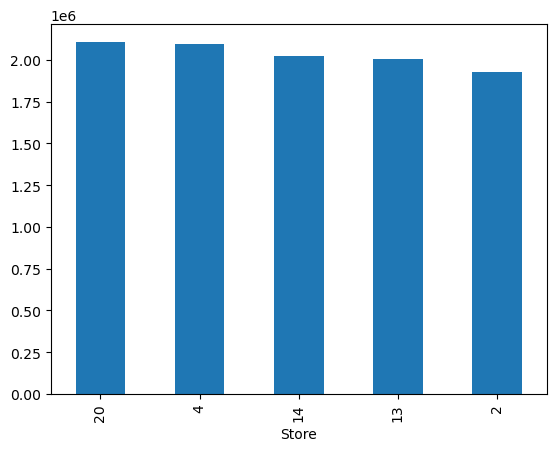

In [38]:
average_weekly_sales.nlargest(5).plot.bar();

Average weekly sales is highest in store 20.

## average CPI at each store

In [39]:
avrg_cpi=df.groupby(['Store'])['CPI'].mean()


In [40]:
avrg_cpi.nlargest(3)

Store
9    219.626689
8    219.439026
3    219.391531
Name: CPI, dtype: float64

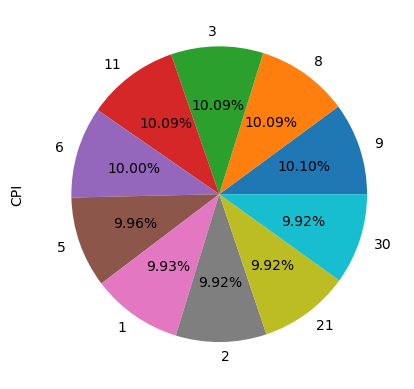

In [74]:
avrg_cpi.nlargest(10).plot.pie(autopct='%1.2f%%');

 Average CPI has largest value in store 9 

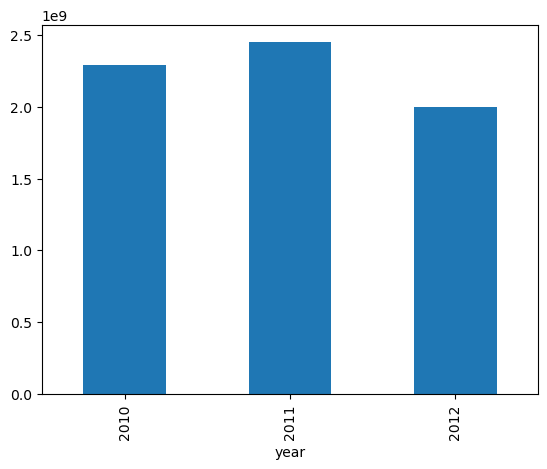

In [42]:
year_weekly_sales=df.groupby(['year'])['Weekly_Sales'].sum()
year_weekly_sales.plot.bar();

2011 has most weekly sales 

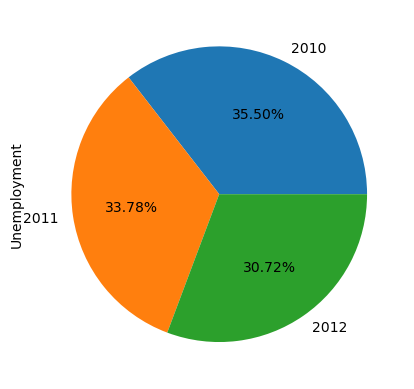

In [43]:
year_unemployment=df.groupby(['year'])['Unemployment'].mean()
year_unemployment.plot.pie(autopct='%1.2f%%');

Unemployment is most in the year 2010 

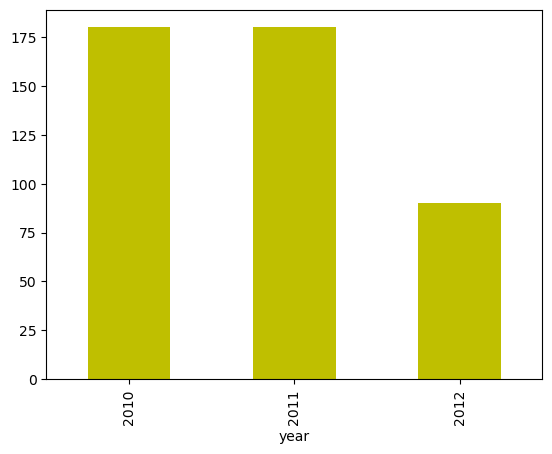

In [44]:
yearly_holiday=df.groupby(['year'])['Holiday_Flag'].sum()
yearly_holiday.plot.bar(color='y');


Unemployment is maximun in the years 2010 and 2011 

## year wise plots

In [45]:
year_2010=df[df.year==2010]
year_2011=df[df.year==2011]
year_2012=df[df.year==2012]
year_2010

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,May,Saturday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,December,wednesday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,February,Thursday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,February,Thursday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,May,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
6335,45,2010-03-12,879244.90,0,40.93,3.046,182.667615,8.724,2010,March,Thursday
6336,45,2010-10-12,1002364.34,0,30.54,3.109,182.551954,8.724,2010,October,Monday
6337,45,2010-12-17,1123282.85,0,30.51,3.140,182.517732,8.724,2010,December,Thursday
6338,45,2010-12-24,1682862.03,0,30.59,3.141,182.544590,8.724,2010,December,Thursday


In [46]:
year_2010.drop(columns='year',inplace=True)
year_2011.drop(columns='year',inplace=True)
year_2012.drop(columns='year',inplace=True)

In [47]:
year_2010

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,May,Saturday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,December,wednesday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,February,Thursday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,February,Thursday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,May,Sunday
...,...,...,...,...,...,...,...,...,...,...
6335,45,2010-03-12,879244.90,0,40.93,3.046,182.667615,8.724,March,Thursday
6336,45,2010-10-12,1002364.34,0,30.54,3.109,182.551954,8.724,October,Monday
6337,45,2010-12-17,1123282.85,0,30.51,3.140,182.517732,8.724,December,Thursday
6338,45,2010-12-24,1682862.03,0,30.59,3.141,182.544590,8.724,December,Thursday


## Weekly sales in each year

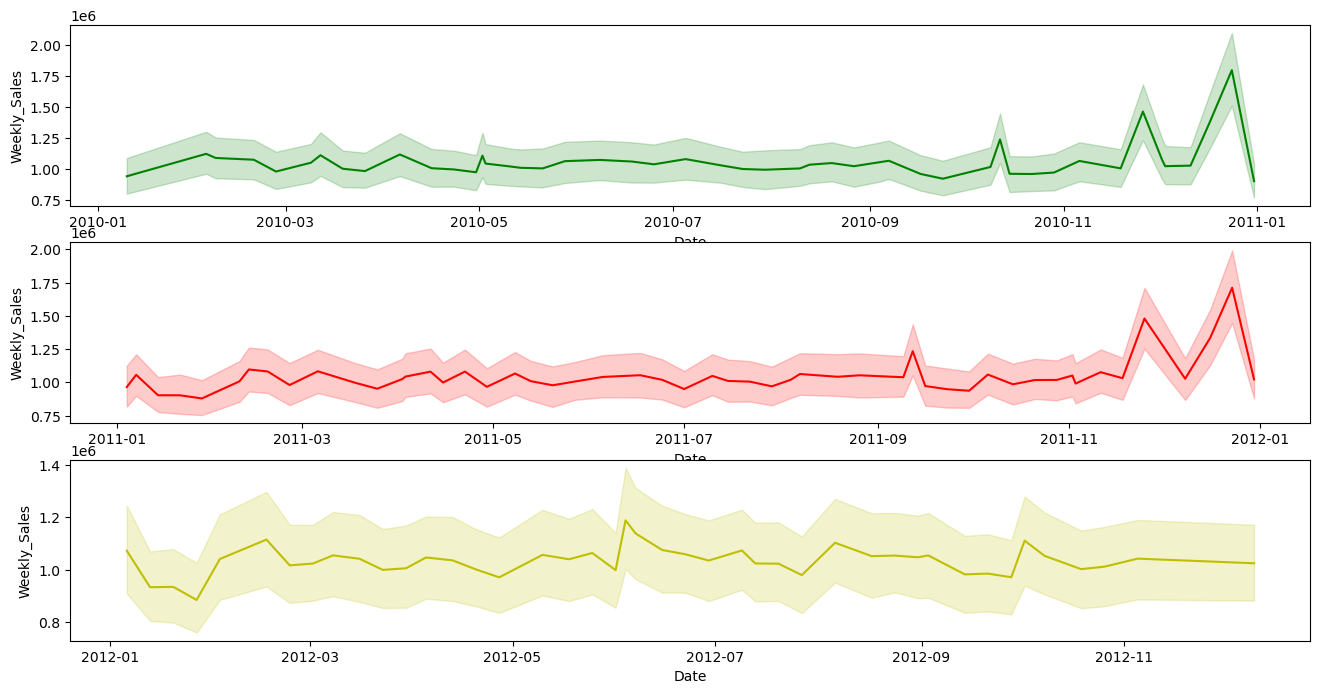

In [48]:
plt.figure(figsize=(16,8))
plt.subplot(3,1,1)
sns.lineplot(data=year_2010,y='Weekly_Sales',x='Date',color='g')

plt.subplot(3,1,2)
sns.lineplot(data=year_2011,x='Date',y='Weekly_Sales',color='r')

plt.subplot(3,1,3)
sns.lineplot(data=year_2012,x='Date',y='Weekly_Sales',color='y')

plt.show()

## Yearly sales from each store

In [49]:
yearly_sales_store=df.groupby(['year','Store'])['Weekly_Sales'].sum()
yearly_sales_store=yearly_sales_store.reset_index()
yearly_sales_store

,year,Store,Weekly_Sales
0,2010,1,73278832.00
1,2010,2,95277864.19
2,2010,3,18745419.00
3,2010,4,95680470.81
4,2010,5,14836030.77
...,...,...,...
130,2012,41,56887839.93
131,2012,42,24950359.85
132,2012,43,26975233.97
133,2012,44,14187373.72


In [50]:
yearly_sales_store.nlargest(6,'Weekly_Sales')

,year,Store,Weekly_Sales
48,2011,4,1.110923e+08
64,2011,20,1.098370e+08
58,2011,14,1.060963e+08
13,2010,14,1.054622e+08
57,2011,13,1.045375e+08
19,2010,20,1.017331e+08


### Plotting weekly sales of year 2010

In [66]:
yearly_sales_store2010_sorted = yearly_sales_store2010.sort_values(by='Weekly_Sales', ascending=False)

In [67]:
yearly_sales_store2010_sorted

,year,Store,Weekly_Sales
13,2010,14,1.054622e+08
19,2010,20,1.017331e+08
3,2010,4,9.568047e+07
1,2010,2,9.527786e+07
12,2010,13,9.527274e+07
9,2010,10,9.447220e+07
26,2010,27,9.001318e+07


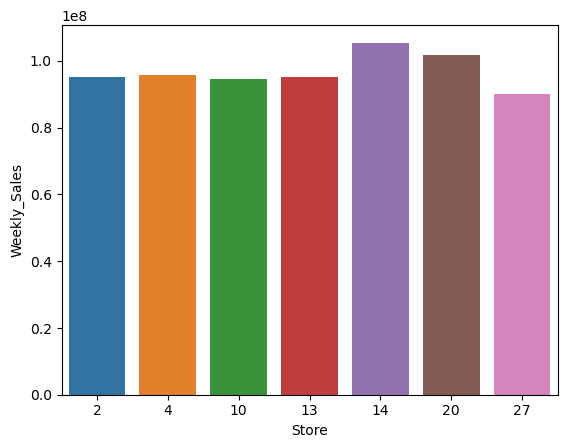

In [68]:
sns.barplot(data=yearly_sales_store2010_sorted, x='Store', y='Weekly_Sales')
plt.show()

In 2010 most weekly sales was in the store 14.

### Plotting weekly sales of year 2011

In [69]:
yearly_sales_store2011_sorted=yearly_sales_store2011.sort_values(by='Weekly_Sales',ascending=False)[:7]
yearly_sales_store2011_sorted

,year,Store,Weekly_Sales
48,2011,4,1.110923e+08
64,2011,20,1.098370e+08
58,2011,14,1.060963e+08
57,2011,13,1.045375e+08
54,2011,10,9.891689e+07
46,2011,2,9.860788e+07
71,2011,27,9.192268e+07


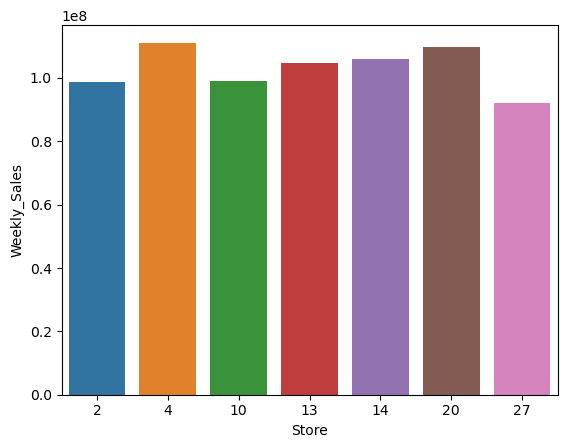

In [70]:
sns.barplot(data=yearly_sales_store2011_sorted,x='Store',y='Weekly_Sales')
plt.show()

In 2011 weekly sales was most in store 4.

### Plotting weekly sales of year 2012

In [71]:
yearly_sales_store2012=yearly_sales_store[yearly_sales_store.year==2012]

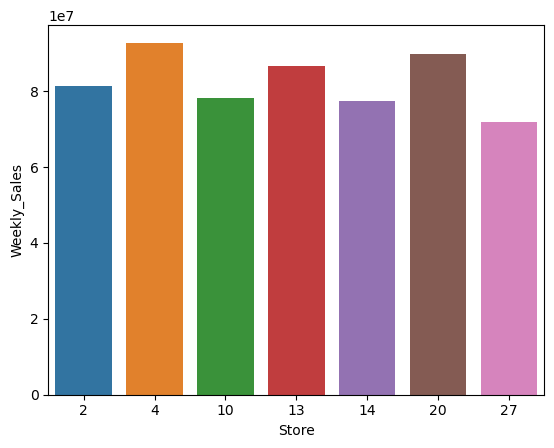

In [72]:
yearly_sales_store2012_sorted=yearly_sales_store2012.sort_values(by='Weekly_Sales',ascending=False)[:7]
sns.barplot(data=yearly_sales_store2012_sorted,x='Store',y='Weekly_Sales')
plt.show()

In 2012 weekly sales was most in the store 4. 

## Temperature conversion

In [75]:
df['celsius']=[(temp-32)*(5/9)for temp in df.Temperature]

### Creating new column heat

In [54]:
df['Heat']=pd.cut(x=df.celsius,bins=[-20,10,35],labels=['cold','warm'])
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,celsius,Heat
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,May,Saturday,5.727778,cold
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,December,wednesday,3.616667,cold
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,February,Thursday,4.405556,cold
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,February,Thursday,8.127778,cold
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,May,Sunday,8.055556,cold
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,September,Thursday,18.266667,warm
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,May,wednesday,18.272222,warm
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,December,Sunday,12.483333,warm
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,October,Thursday,13.594444,warm


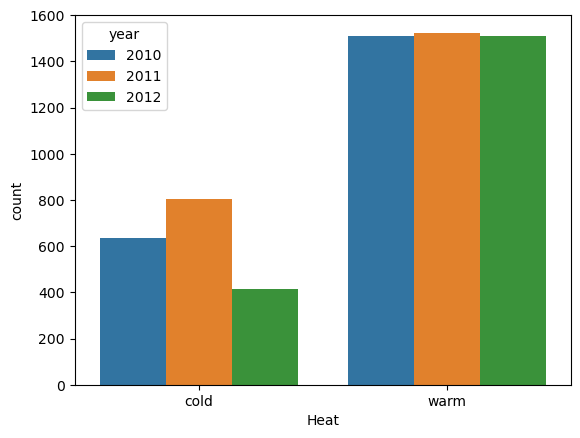

In [73]:
sns.countplot(data=df,x='Heat',hue='year');

Most frequent climatic condition is warm. 

## Heat map

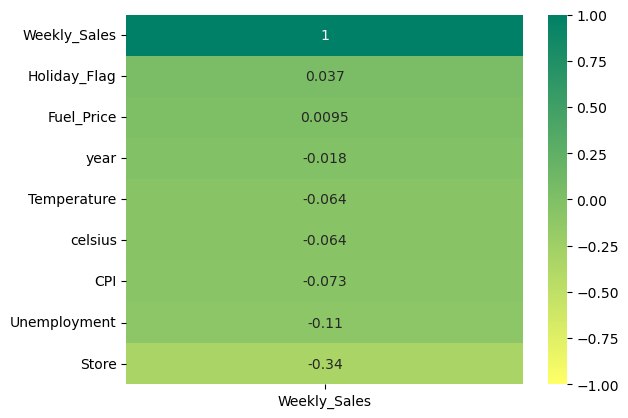

In [90]:
sns.heatmap(df.corr()[['Weekly_Sales']].sort_values(by='Weekly_Sales',ascending=False),vmax=1,vmin=-1,annot=True,cmap='summer_r')
plt.show()

### Plotting with pivot tables

In [92]:
monthly_sales=pd.pivot_table(data=df,values='Weekly_Sales',index='month',columns='year')
monthly_sales

year,2010,2011,2012
month,,,
April,1.021177e+06,1.033220e+06,1.014127e+06
August,1.025212e+06,1.044895e+06,1.064514e+06
December,1.198413e+06,1.274311e+06,1.025078e+06
February,1.064372e+06,1.042273e+06,1.057997e+06
January,9.386639e+05,9.420697e+05,9.567817e+05
July,1.023702e+06,9.976049e+05,1.025480e+06
June,1.055082e+06,1.038471e+06,1.082920e+06
March,1.034590e+06,1.011263e+06,1.025510e+06
May,1.039303e+06,1.015565e+06,1.053948e+06


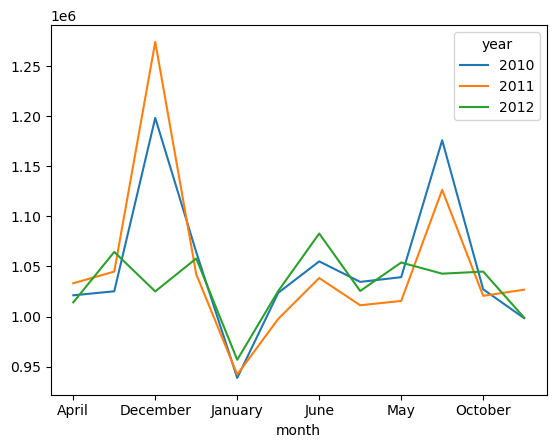

In [94]:
monthly_sales.plot()
plt.show()

In [95]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,celsius,Heat
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,May,Saturday,5.727778,cold
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,December,wednesday,3.616667,cold
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,February,Thursday,4.405556,cold
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,February,Thursday,8.127778,cold
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,May,Sunday,8.055556,cold
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,September,Thursday,18.266667,warm
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,May,wednesday,18.272222,warm
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,December,Sunday,12.483333,warm
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,October,Thursday,13.594444,warm


In [104]:
daily_sales=df.groupby(['day'])['Weekly_Sales'].sum()
daily_sales

day
Friday       2.824947e+08
Monday       4.335075e+08
Saturday     4.266091e+08
Sunday       5.390133e+08
Thursday     4.486257e+09
Tuesday      9.271282e+07
wednesday    4.766244e+08
Name: Weekly_Sales, dtype: float64

Tuesday has most daily sales